In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/DR_Messidor_Dataset")))

In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
img_height = 256
img_width = 256
channels = 3
batch_size = 8
epochs = 30

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/DR_Messidor_Dataset/train',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     class_mode = 'binary',
     subset = 'training',
     shuffle=True)



test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/DR_Messidor_Dataset/test',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     shuffle = False,
     class_mode = 'binary')

print(training_set.class_indices)

In [ ]:
model = tf.keras.applications.MobileNetV2(weights = "imagenet", include_top=False, 
input_shape = (img_width, img_height, channels),classifier_activation="softmax")

In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=30,
          validation_data=test_set,
          validation_steps=test_set.n // batch_size)

Epoch 1/30
38/38 [==============================] - 40s 972ms/step - loss: 0.4600 - accuracy: 0.8276 - precision: 0.8554 - recall: 0.7760 - auc: 0.9140 - val_loss: 0.5721 - val_accuracy: 0.6750 - val_precision: 1.0000 - val_recall: 0.4222 - val_auc: 0.9571
Epoch 2/30
38/38 [==============================] - 36s 935ms/step - loss: 0.2791 - accuracy: 0.8822 - precision: 0.8788 - recall: 0.8593 - auc: 0.9540 - val_loss: 0.3591 - val_accuracy: 0.8000 - val_precision: 1.0000 - val_recall: 0.6444 - val_auc: 0.9695
Epoch 3/30
38/38 [==============================] - 36s 934ms/step - loss: 0.3737 - accuracy: 0.8552 - precision: 0.8382 - recall: 0.8444 - auc: 0.9339 - val_loss: 0.4114 - val_accuracy: 0.7625 - val_precision: 0.9643 - val_recall: 0.6000 - val_auc: 0.9686
Epoch 4/30
38/38 [==============================] - 35s 930ms/step - loss: 0.3568 - accuracy: 0.8721 - precision: 0.8712 - recall: 0.8456 - auc: 0.9375 - val_loss: 0.5531 - val_accuracy: 0.7375 - val_precision: 1.0000 - val_recal

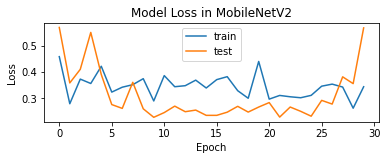

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in MobileNetV2')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
MobileNetV2_train_loss = history.history['loss']
MobileNetV2_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossMobileNetV2.png')
pyplot.legend()
pyplot.show()

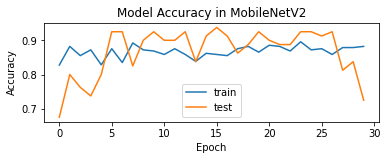

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in MobileNetV2')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
MobileNetV2_train_accuracy = history.history['accuracy']
MobileNetV2_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyMobileNetV2.png')
pyplot.legend()
pyplot.show()

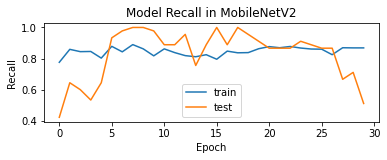

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Recall in MobileNetV2')
pyplot.ylabel('Recall')
pyplot.xlabel('Epoch')
MobileNetV2_train_recall = history.history['recall']
MobileNetV2_test_recall = history.history['val_recall']
pyplot.plot(history.history['recall'], label='train')
pyplot.plot(history.history['val_recall'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/RecallMobileNetV2.png')
pyplot.legend()
pyplot.show()

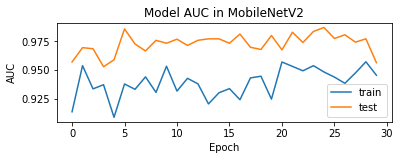

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model AUC in MobileNetV2')
pyplot.ylabel('AUC')
pyplot.xlabel('Epoch')
MobileNetV2_train_auc = history.history['auc']
MobileNetV2_test_auc = history.history['val_auc']
pyplot.plot(history.history['auc'], label='train')
pyplot.plot(history.history['val_auc'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AucMobileNetV2.png')
pyplot.legend()
pyplot.show()

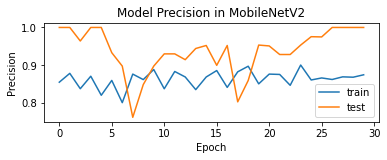

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Precision in MobileNetV2')
pyplot.ylabel('Precision')
pyplot.xlabel('Epoch')
MobileNetV2_train_precision = history.history['precision']
MobileNetV2_test_precision = history.history['val_precision']
pyplot.plot(history.history['precision'], label='train')
pyplot.plot(history.history['val_precision'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/PrecisionMobileNetV2.png')
pyplot.legend()
pyplot.show()

In [ ]:
top_model.compile(optimizer='sgd',
              loss='mse',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = top_model.fit(training_set, validation_data = test_set, epochs=1, batch_size=32, verbose=2)

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[105,15],
         [19,84]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/ConfusionMatrix_MobileNetV2_train.png')
pyplot.show()

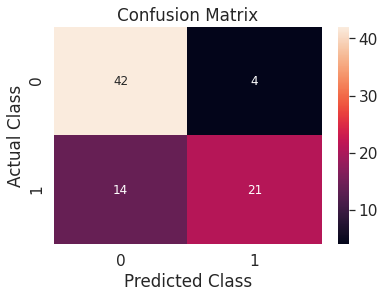

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[42,4],
         [14,21]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/ConfusionMatrix_MobileNetV2_test.png')
pyplot.show()